In [243]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt


In [244]:
stock = 'SQ'
df = yf.download(stock, start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [245]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,54.099998,57.830002,53.560001,57.200001,57.200001,13434000
2019-01-03,55.580002,56.730000,52.259998,52.419998,52.419998,19076300
2019-01-04,54.400002,59.660000,53.861000,58.180000,58.180000,30228600
2019-01-07,59.000000,61.290001,58.049999,60.720001,60.720001,18146900
2019-01-08,62.599998,63.799999,61.150002,63.119999,63.119999,21511800
...,...,...,...,...,...,...
2023-03-09,77.820000,79.620003,73.500000,73.800003,73.800003,12475200
2023-03-10,70.610001,73.580002,68.470001,71.010002,71.010002,18375700
2023-03-13,70.000000,71.099998,67.250000,69.459999,69.459999,14357400


In [246]:
df['ma_20'] = df.Close.rolling(20).mean()
df['vol'] = df.Close.rolling(20).std()
df['upper_bb'] = df.ma_20 + 2*df.vol
df['lower_bb'] = df.ma_20 - 2*df.vol

<AxesSubplot: title={'center': 'SQ Stock price and Bollinger Band'}, xlabel='Date'>

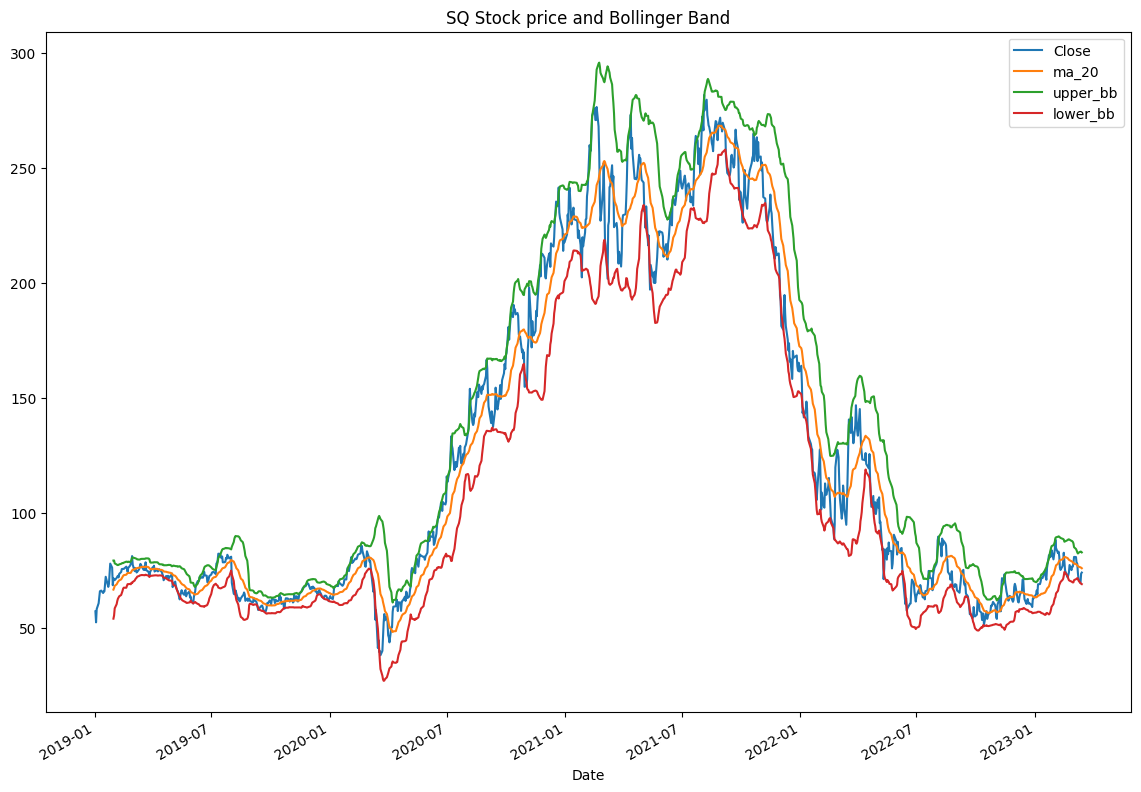

In [247]:
# The argument for df needs to be either the index, or a single header or a list of headers hence the double brackets in that latter case
# Also note the use of f-strings in the title, just for fun
df[['Close', 'ma_20','upper_bb', 'lower_bb']].plot(figsize = (14, 10), title = f'{stock} Stock price and Bollinger Band')

In [248]:
df['rsi'] = ta.momentum.rsi(df.Close, window = 6)


In [249]:
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi
Date,,,,,,,,,,,
2019-01-02,54.099998,57.830002,53.560001,57.200001,57.200001,13434000,NaN,NaN,NaN,NaN,NaN
2019-01-03,55.580002,56.730000,52.259998,52.419998,52.419998,19076300,NaN,NaN,NaN,NaN,NaN
2019-01-04,54.400002,59.660000,53.861000,58.180000,58.180000,30228600,NaN,NaN,NaN,NaN,NaN
2019-01-07,59.000000,61.290001,58.049999,60.720001,60.720001,18146900,NaN,NaN,NaN,NaN,NaN
2019-01-08,62.599998,63.799999,61.150002,63.119999,63.119999,21511800,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09,77.820000,79.620003,73.500000,73.800003,73.800003,12475200,76.8895,2.739292,82.368084,71.410916,32.622416
2023-03-10,70.610001,73.580002,68.470001,71.010002,71.010002,18375700,76.6310,3.037479,82.705959,70.556042,25.528428
2023-03-13,70.000000,71.099998,67.250000,69.459999,69.459999,14357400,76.3425,3.426638,83.195776,69.489223,22.296118


In [250]:
# Create conditions and choices for long positions
long_conditions = [(df.rsi < 30) & (df.Close < df.lower_bb), (df.rsi > 70) & (df.Close > df.upper_bb)]
long_choices = ['Buy', 'Sell']

# Create conditions and choices for short positions
short_conditions = [(df.rsi > 70) & (df.Close > df.upper_bb), (df.rsi < 30) & (df.Close < df.lower_bb)]
short_choices = ['Sell', 'Buy']

# At the moment the conditions for long and short are symmetrical but this provides flexibility to have different rules 
# for entering the position (long or short) and subsequently covering it

# Use the np.select method which is very useful when working with multiple conditions
# Conditions and Choices must be the same length
df['long_signal'] = np.select(long_conditions, long_choices)
df['short_signal'] = np.select(short_conditions, short_choices)

In [251]:
df.dropna(inplace = True)

In [252]:
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,long_signal,short_signal
Date,,,,,,,,,,,,,
2019-01-30,71.010002,71.599998,68.720001,71.529999,71.529999,18710400,66.6595,6.321133,79.301766,54.017234,53.228844,0,0
2019-01-31,70.029999,73.860001,69.980003,71.349998,71.349998,15679400,67.3670,5.989839,79.346678,55.387322,52.662931,0,0
2019-02-01,71.050003,71.279999,69.720001,70.800003,70.800003,12677800,68.2860,4.883736,78.053472,58.518528,50.687025,0,0
2019-02-04,71.000000,72.620003,70.400002,71.750000,71.750000,10582100,68.9645,4.315380,77.595259,60.333741,54.245314,0,0
2019-02-05,73.000000,75.169998,72.269997,72.279999,72.279999,19150500,69.5425,3.907931,77.358362,61.726637,56.353753,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09,77.820000,79.620003,73.500000,73.800003,73.800003,12475200,76.8895,2.739292,82.368084,71.410916,32.622416,0,0
2023-03-10,70.610001,73.580002,68.470001,71.010002,71.010002,18375700,76.6310,3.037479,82.705959,70.556042,25.528428,0,0
2023-03-13,70.000000,71.099998,67.250000,69.459999,69.459999,14357400,76.3425,3.426638,83.195776,69.489223,22.296118,Buy,Buy


In [253]:
# Shifting signal by 1 (the default in the shift function) so that we can scan directly in the row for the open price
# This is to avoid the look forward bias
df.long_signal = df.long_signal.shift() 
df.short_signal = df.short_signal.shift() 

In [254]:
# Introducing a shift in the Close as well to manage stop losses
df['shifted_close'] = df.Close.shift()

In [255]:
# Taking Long positions 
in_long_position = False
buydates_long, selldates_long = [], []
buyprices_long, sellprices_long = [], []

for index, row in df.iterrows():
    if not in_long_position and row['long_signal'] == 'Buy':
        buydates_long.append(index)
        buyprices_long.append(row.Open)
        in_long_position = True

    if in_long_position and (row['long_signal'] == 'Sell' or row.shifted_close < 0.80 * buyprices_long[-1]):
        selldates_long.append(index)
        sellprices_long.append(row.Open)
        in_long_position = False
    

# Taking Short positions
in_short_position = False
buydates_short, selldates_short = [], []
buyprices_short, sellprices_short = [], []

for index, row in df.iterrows():
    if not in_short_position and row['short_signal'] == 'Sell':
        selldates_short.append(index)
        sellprices_short.append(row.Open)
        in_short_position = True

    if in_short_position and (row['short_signal'] == 'Buy' or row.shifted_close > 1.20 * sellprices_short[-1]):
        buydates_short.append(index)
        buyprices_short.append(row.Open)
        in_short_position = False

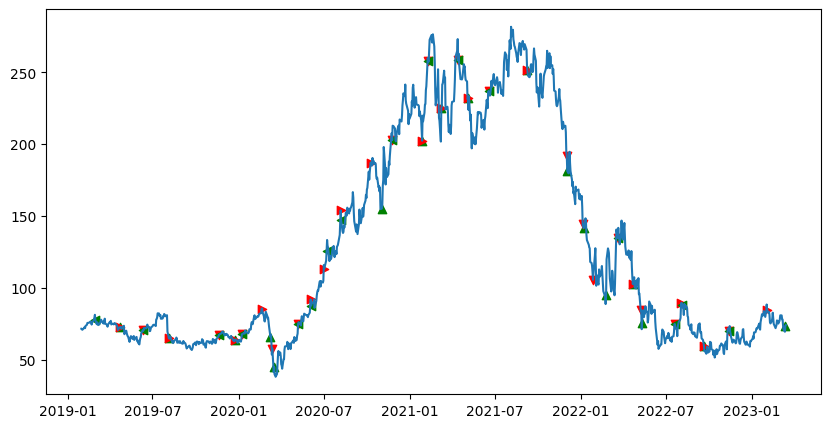

In [256]:
plt.figure(figsize = (10, 5))
plt.plot(df.Close)
plt.scatter(df.loc[buydates_long].index, df.loc[buydates_long].Close, marker = '^', color = 'g')
plt.scatter(df.loc[selldates_long].index, df.loc[selldates_long].Close, marker = 'v', color = 'r')

plt.scatter(df.loc[buydates_short].index, df.loc[buydates_short].Close, marker = '>', color = 'r')
plt.scatter(df.loc[selldates_short].index, df.loc[selldates_short].Close, marker = '<', color = 'g')

In [257]:
# Note the use of the zip function that aggregates together the two lists
pnl = pd.DataFrame(data = {'Long positions':[(sell - buy) for sell, buy in zip(sellprices_long, buyprices_long)], 
                           'Short positions':[(buy - sell) for sell, buy in zip(sellprices_short, buyprices_short)]})

<AxesSubplot: >

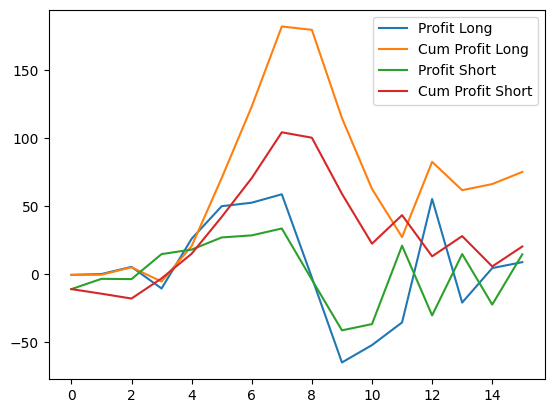

In [258]:
profit = pd.DataFrame(data = {'Profit Long':pnl['Long positions'], 'Cum Profit Long':pnl['Long positions'].cumsum(), 
                              'Profit Short':pnl['Short positions'], 'Cum Profit Short':pnl['Short positions'].cumsum()})
profit.plot()


In [259]:
profit.iloc[-1]

Profit Long          8.889999
Cum Profit Long     75.159981
Profit Short        14.650002
Cum Profit Short    20.380001
Name: 15, dtype: float64